In [1]:
# Increasing jupyter notebook width sizes

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Import necessary python libraries

import pandas as pd
import numpy as np
# importing pandas profile
import pandas_profiling
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the file 
churn = pd.read_excel("churn.xlsx")

In [4]:
churn.shape

(4617, 22)

The dataset has 4617 observations with 22 variables.

In [5]:
churn.columns

Index(['Unnamed: 0', 'columns1', 'columns2', 'columns3', 'columns4',
       'columns5', 'columns6', 'columns7', 'columns8', 'columns9', 'columns10',
       'columns11', 'columns12', 'columns13', 'columns14', 'columns15',
       'columns16', 'columns17', 'columns18', 'columns19', 'columns20',
       'columns21'],
      dtype='object')

In [6]:
# Renaming the columns names as per the description
churn.rename(columns = {'columns1': 'State', 'columns2': 'Account_Length', 'columns3': 'Area_Code', 'columns4': 'Phone','columns5': 'International_plan',
                     'columns6': 'VMail_Plan', 'columns7': 'Vmail_Message', 'columns8' : 'Day_Mins',
                     'columns9':'Day_Calls','columns10':'Day_Charge','columns11' :'Eve_Mins','columns12':'Eve_Calls',
                     'columns13': 'Eve_Charge', 'columns14': 'Night_Mins','columns15':'Night_Calls',
                     'columns16': 'Night_Charge','columns17':'International_Mins','columns18':'International_Calls',
                     'columns19':'International_Charge','columns20': 'CustServ_Calls','columns21':'Churn'}, inplace = True)

In [7]:
churn.columns

Index(['Unnamed: 0', 'State', 'Account_Length', 'Area_Code', 'Phone',
       'International_plan', 'VMail_Plan', 'Vmail_Message', 'Day_Mins',
       'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge',
       'Night_Mins', 'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_Calls', 'International_Charge', 'CustServ_Calls',
       'Churn'],
      dtype='object')

In [8]:
churn.head()

,Unnamed: 0,State,Account_Length,Area_Code,Phone,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
churn.dtypes

Unnamed: 0                int64
State                    object
Account_Length            int64
Area_Code                 int64
Phone                    object
International_plan       object
VMail_Plan               object
Vmail_Message             int64
Day_Mins                float64
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_Calls       int64
International_Charge    float64
CustServ_Calls            int64
Churn                    object
dtype: object

In [10]:
del churn['Unnamed: 0']

In [11]:
churn.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_plan',
       'VMail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_Calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

# Exploratory Data Analysis


The purpose of this stage is to understand the relationship of each variale with outcome varibale using graphs and generate useful information for the client.
This will also lead to techincal inputs for further processing



















In [12]:
# Coverting object into float for columns 6 to 20
churn.iloc[:, 6:20] = churn.iloc[:, 6:20].apply(pd.to_numeric)

In [13]:
churn.iloc[:, 1:3] = churn.iloc[:, 1:3].apply(pd.to_numeric)

In [14]:
churn.dtypes

State                    object
Account_Length            int64
Area_Code                 int64
Phone                    object
International_plan       object
VMail_Plan               object
Vmail_Message             int64
Day_Mins                float64
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_Calls       int64
International_Charge    float64
CustServ_Calls            int64
Churn                    object
dtype: object

In [15]:
churn.head()

,State,Account_Length,Area_Code,Phone,International_plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [16]:
# To check the target variable churn
churn['Churn'].value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

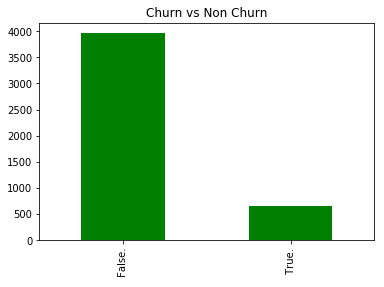

In [17]:
# 3961 belongs to false and 656 belongs to True. This is an imbalance dataset
churn['Churn'].value_counts().plot(kind = 'bar', title = 'Churn vs Non Churn', color = 'green', align = 'center')
plt.show()

In [18]:
# Visualizing International Plan with target variable
churn['International_plan'].value_counts()

 no     4171
 yes     446
Name: International_plan, dtype: int64

In [19]:
a = pd.crosstab(churn["Churn"], churn["International_plan"])

In [20]:
a

International_plan,no,yes
Churn,,
False.,3701,260
True.,470,186


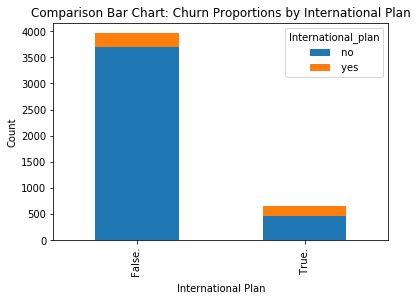

In [21]:
a.plot(kind = 'bar', stacked = 'true', title = "Comparison Bar Chart: Churn Proportions by International Plan")
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

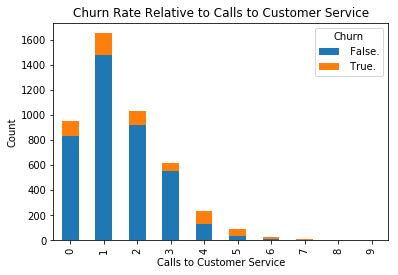

In [22]:
cust_serv_churn = pd.crosstab(churn['CustServ_Calls'], churn['Churn'])
cust_serv_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Calls to Customer Service')
plt.title('Churn Rate Relative to Calls to Customer Service')
plt.show()

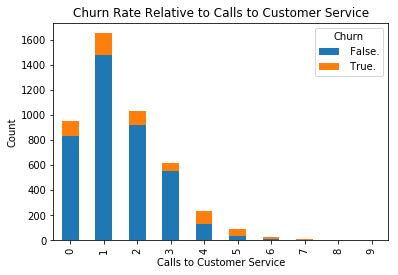

In [23]:
cust_serv_churn = pd.crosstab(churn['CustServ_Calls'], churn['Churn'])
cust_serv_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Calls to Customer Service')
plt.title('Churn Rate Relative to Calls to Customer Service')
plt.show()

In [24]:
b = pd.crosstab(churn["Churn"], churn["VMail_Plan"])

In [25]:
b

VMail_Plan,no,yes
Churn,,
False.,2822,1139
True.,559,97


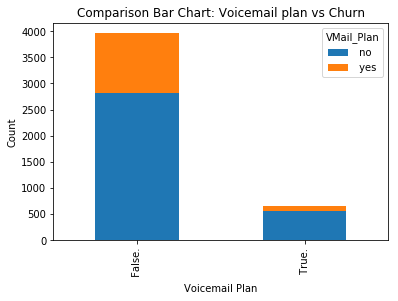

In [26]:
b.plot(kind = 'bar', stacked = 'true', title = "Comparison Bar Chart: Voicemail plan vs Churn")
plt.xlabel('Voicemail Plan')
plt.ylabel('Count')
plt.show()

# Visualization in Tableau

In [27]:
%%html
<div class='tableauPlaceholder' id='viz1561784560582' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TelecomChurn_15617246909080&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TelecomChurn_15617246909080&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TelecomChurn_15617246909080&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561784560582');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1280px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [28]:
%%html
<div class='tableauPlaceholder' id='viz1562138900629' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecomechurnmap&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Telecomechurnmap&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Telecomechurnmap&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1562138900629');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1000px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>